# Introducción al Reinforcement Learning
## El problemas de las $k$-máquinas de dinero
Imáginemos que tenemos $k$ cubetas, cada una con billetes y queremos encontrar un algoritmo maximice el ingreso a largo plazo de escoger billetes al azar de cada cubeta.

Tomaremos $k=2$ cubetas $X_1, X_2$ y supondremos que cada una tiene billetes que se distribuyen $X_i \sim \text{Norm}(\mu_i, \sigma_i)$ donde $\mu_i, \sigma_i$ para $i=1,2$ son cantidades desconocidas para el jugador que tiene que decidir qué cubeta usar.

In [1]:
using Distributions

In [2]:
function cubeta_1()
    rand(Normal(40, 10))
end

cubeta_1 (generic function with 1 method)

In [3]:
function cubeta_2()
    rand(Normal(70, 70))
end 

cubeta_2 (generic function with 1 method)

In [4]:
cubeta_1()

33.29919475070617

In [5]:
cubeta_2()

3.565538954524257

### First 
version

In [9]:
srand(100)

function e_greedy(nsim::Int, e::Real = 0)
    # inititation & preallocation
    average_1 = cubeta_1()
    average_2 = cubeta_2()
    count_1 = 1
    count_2 = 1
    earnings = zeros(Float32, nsim)
    # e-greedy iteration
    for i = 2:nsim
        u = rand() # numero aleatorio entre 0 y 1
        if u > e # be greedy
            if average_1 > average_2
                count_1 += 1
                new_reward = cubeta_1()
                average_1 += (new_reward - average_1)/count_1
            else
                count_2 += 1
                new_reward = cubeta_2()
                average_2 += (new_reward - average_2)/count_2
            end
            earnings[i] = earnings[i-1] + new_reward
        else
            cubeta_random = rand(1:2)
            if cubeta_random == 1
                count_1 += 1
                new_reward = cubeta_1()
                average_1 += (new_reward - average_1)/count_1   
            else
                count_2 += 1
                new_reward = cubeta_2()
                average_2 += (new_reward - average_2)/count_2
            end           
            earnings[i] = earnings[i-1] + new_reward
        end
    end
    return earnings
end

e_greedy (generic function with 2 methods)

In [10]:
using DataFrames
nsim = 1000
results = DataFrame()
e_values = [0, 0.001, 0.01, 0.1, 0.25] 
for e in e_values
    # reset the problem  
    srand(9999)
    # simulate
    earnings = e_greedy(nsim, e)
    results = vcat(results, DataFrame(
    sim = 1:nsim,
    e = repmat(["$e"], nsim),
    average_earnings = earnings./(1:nsim)
    ))
end
head(results)

,sim,e,average_earnings
1,1,0.0,0.0
2,2,0.0,17.383827
3,3,0.0,27.413443
4,4,0.0,32.114395
5,5,0.0,36.163506
6,6,0.0,38.50832


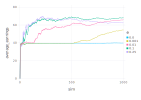

In [11]:
using Gadfly
plot(results, x=:sim, y=:average_earnings, color=:e, Geom.line)